In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("wifi.csv")

In [4]:
data.head()

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,10362,3,Limited Free,ALTICEUSA,Linden Park,IN PARK PLAYGROUND AREA,40.658385,-73.887583,1.015441e+06,179163.810029,...,East New York,42,11207,305,1104,1104,0,3043490001,217,"(40.658385, -73.8875829994)"
1,10447,4,Limited Free,SPECTRUM,Elmhurst Park,Park Area,40.728838,-73.883751,1.016470e+06,204833.279032,...,Elmhurst,25,11373,404,499,499,0,0,824,"(40.7288380002, -73.8837509996)"
2,10605,3,Free,AT&T,Hillside Park,Near Vine St and Columbia Heights,40.701500,-73.994300,9.858305e+05,194851.884952,...,Brooklyn Heights-Cobble Hill,33,11201,302,1,1,0,3002050001,1409,"(40.7014999998, -73.9943000006)"
3,9753,3,Free,NYCHA,0,331 Myrtle Ave,40.693442,-73.973193,9.916838e+05,191917.129995,...,Fort Greene,35,11205,302,18501,18501,3335255,3020410001,665,"(40.6934417997, -73.9731930998)"
4,9884,3,Free,Downtown Brooklyn,NaN,409 Fulton St.,40.692178,-73.988304,9.874935e+05,191455.769697,...,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,33,11201,302,11,11,3000281,3001440001,1028,"(40.6921780001, -73.9883039999)"


In [5]:
data.shape

(3319, 29)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3319 entries, 0 to 3318
Data columns (total 29 columns):
OBJECTID                                       3319 non-null int64
Borough                                        3319 non-null int64
Type                                           3319 non-null object
Provider                                       3319 non-null object
Name                                           3089 non-null object
Location                                       3319 non-null object
Latitude                                       3319 non-null float64
Longitude                                      3319 non-null float64
X                                              3319 non-null float64
Y                                              3319 non-null float64
Location_T                                     3319 non-null object
Remarks                                        2771 non-null object
City                                           3319 non-null object
SSID   

In [7]:
len(data["OBJECTID"].unique())

3319

In [8]:
data = data.rename(columns={"OBJECTID": "Hotspot ID",
                            "Neighborhood Tabulation Area (NTA)": "Neighborhood"})

In [11]:
data.head()

,Hotspot ID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Neighborhood,Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,10362,3,Limited Free,ALTICEUSA,Linden Park,IN PARK PLAYGROUND AREA,40.658385,-73.887583,1.015441e+06,179163.810029,...,East New York,42,11207,305,1104,1104,0,3043490001,217,"(40.658385, -73.8875829994)"
1,10447,4,Limited Free,SPECTRUM,Elmhurst Park,Park Area,40.728838,-73.883751,1.016470e+06,204833.279032,...,Elmhurst,25,11373,404,499,499,0,0,824,"(40.7288380002, -73.8837509996)"
2,10605,3,Free,AT&T,Hillside Park,Near Vine St and Columbia Heights,40.701500,-73.994300,9.858305e+05,194851.884952,...,Brooklyn Heights-Cobble Hill,33,11201,302,1,1,0,3002050001,1409,"(40.7014999998, -73.9943000006)"
3,9753,3,Free,NYCHA,0,331 Myrtle Ave,40.693442,-73.973193,9.916838e+05,191917.129995,...,Fort Greene,35,11205,302,18501,18501,3335255,3020410001,665,"(40.6934417997, -73.9731930998)"
4,9884,3,Free,Downtown Brooklyn,NaN,409 Fulton St.,40.692178,-73.988304,9.874935e+05,191455.769697,...,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,33,11201,302,11,11,3000281,3001440001,1028,"(40.6921780001, -73.9883039999)"


In [16]:
neighborhood = data.groupby('Neighborhood')
neighborhood_count = pd.DataFrame(neighborhood['Neighborhood'].count())
neighborhood_count = neighborhood_count.rename(columns={"Neighborhood": "Count"})
neighborhood_count

,Count
Neighborhood,
Annadale-Huguenot-Prince's Bay-Eltingville,5
Astoria,54
Auburndale,1
Baisley Park,17
Bath Beach,8
...,...
Yorkville,14
park-cemetery-etc-Bronx,34
park-cemetery-etc-Brooklyn,27


In [17]:
neighborhood_count_sorted = neighborhood_count.sort_values('Count', ascending = False)

neighborhood_count_sorted

,Count
Neighborhood,
Midtown-Midtown South,160
Hudson Yards-Chelsea-Flatiron-Union Square,156
Upper West Side,143
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,125
Turtle Bay-East Midtown,111
...,...
Charleston-Richmond Valley-Tottenville,1
Spuyten Duyvil-Kingsbridge,1
Cambria Heights,1


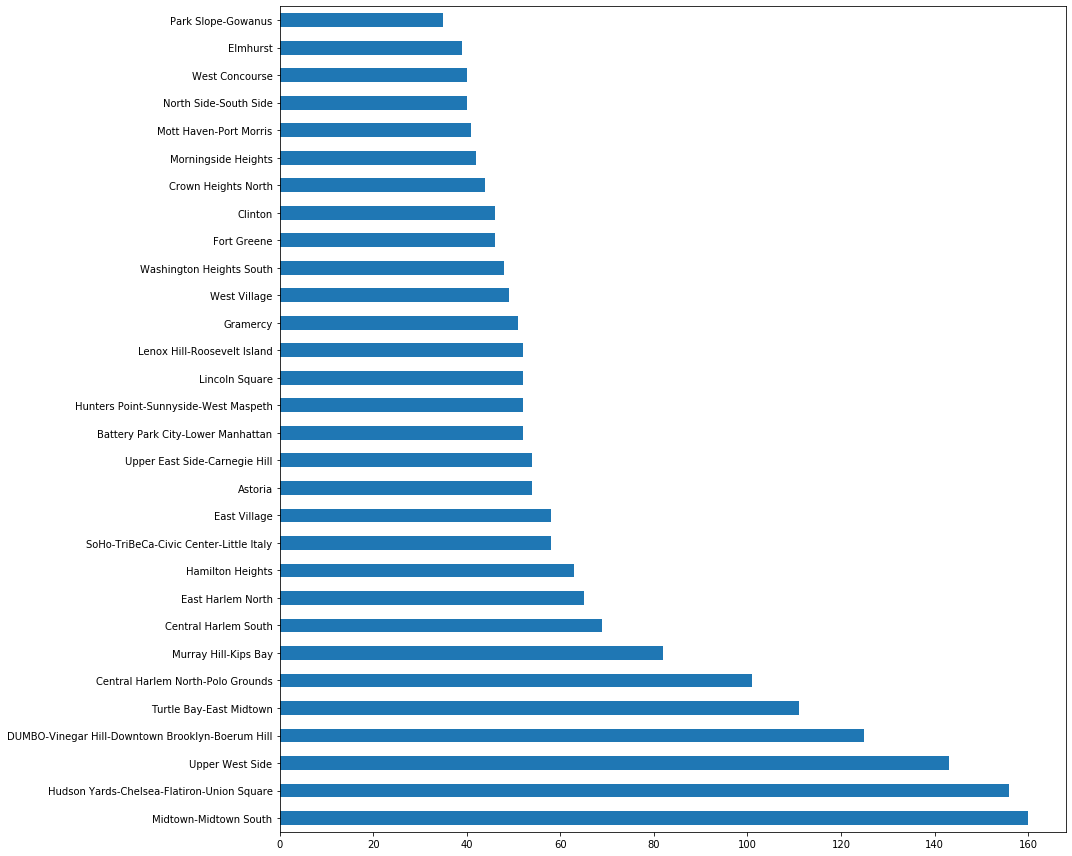

In [18]:
data['Neighborhood'].value_counts().head(30).plot(kind='barh', figsize=(15,12))
plt.tight_layout()
plt.show()

In [137]:
fig_1.savefig("line-1.png")

In [19]:
len(data["Activated"])

3319

In [20]:
data.columns

Index(['Hotspot ID', 'Borough', 'Type', 'Provider', 'Name', 'Location',
       'Latitude', 'Longitude', 'X', 'Y', 'Location_T', 'Remarks', 'City',
       'SSID', 'SourceID', 'Activated', 'BoroCode', 'Borough Name',
       'Neighborhood Tabulation Area Code (NTACODE)', 'Neighborhood',
       'Council Distrcit', 'Postcode', 'BoroCD', 'Census Tract', 'BCTCB2010',
       'BIN', 'BBL', 'DOITT_ID', 'Location (Lat, Long)'],
      dtype='object')

In [21]:
location_group = data.groupby('Location_T')

location_count = pd.DataFrame(location_group['Location_T'].count())

location_group_count = location_count.rename(columns={"Location_T": "Count"})

location_group_count.head()

,Count
Location_T,
Indoor,126
Indoor AP - Community Center - Activity Rm 1,1
Indoor AP - Community Center - Activity Rm 2,1
Indoor AP - Community Center - Cafeteria,1
Indoor AP - Community Center - Computer Rm,1


In [22]:
location_count_sorted = location_group_count.sort_values('Count', ascending = False)

location_count_sorted

,Count
Location_T,
Outdoor Kiosk,1867
Outdoor,699
Subway Station,276
Library,214
Indoor,126
Outdoor TWC Aerial,121
Indoor AP - North Maintenance Area,3
Indoor AP - South Maintenance Area,3
Indoor AP - North Management Office,2


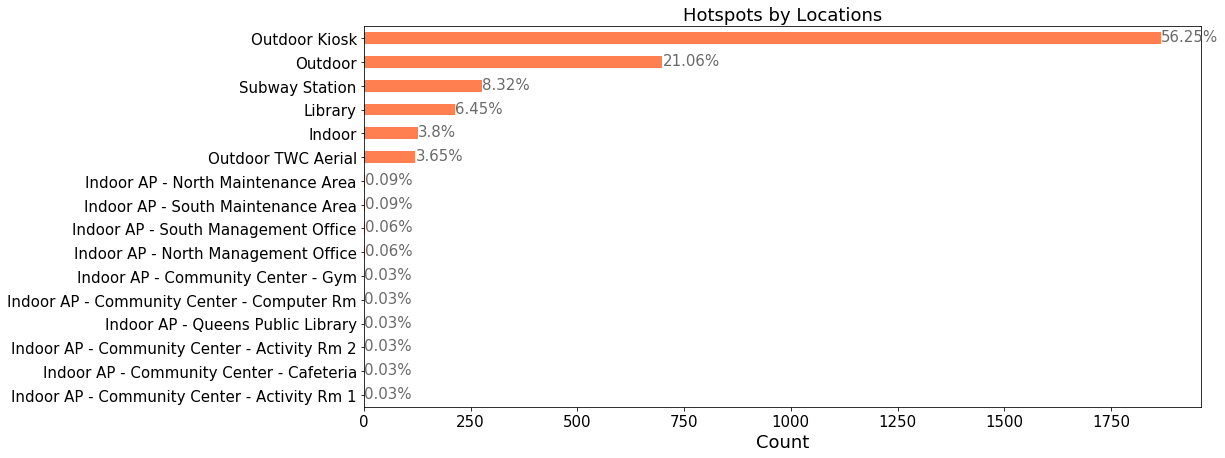

In [53]:
ax = data['Location_T'].value_counts().plot(kind='barh', figsize=(15,7),
                                        color="coral", fontsize=15);
ax.set_alpha(0.8)
ax.set_title("Hotspots by Locations", fontsize=18)
ax.set_xlabel("Count", fontsize=18);
#ax.set_xticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

ax.invert_yaxis()

In [52]:
fig = ax.get_figure()
fig.savefig("output.png")

In [167]:
population = pd.read_csv("population.csv")

In [168]:
population.head()

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,Bronx,2000,5,BX01,Claremont-Bathgate,28149
1,Bronx,2000,5,BX03,Eastchester-Edenwald-Baychester,35422
2,Bronx,2000,5,BX05,Bedford Park-Fordham North,55329
3,Bronx,2000,5,BX06,Belmont,25967
4,Bronx,2000,5,BX07,Bronxdale,34309


In [169]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 6 columns):
Borough             390 non-null object
Year                390 non-null int64
FIPS County Code    390 non-null int64
NTA Code            390 non-null object
NTA Name            390 non-null object
Population          390 non-null int64
dtypes: int64(3), object(3)
memory usage: 18.4+ KB


In [176]:
population.columns

Index(['Borough', 'Year', 'FIPS County Code', 'NTA Code', 'NTA Name',
       'Population'],
      dtype='object')

In [179]:
population.drop(labels=['Year', 'FIPS County Code', 'NTA Code', 'NTA Name'], axis=1, inplace=True)

In [180]:
population.head()

,Borough,Population
0,Bronx,28149
1,Bronx,35422
2,Bronx,55329
3,Bronx,25967
4,Bronx,34309
